# 误差（Errors）

误差的基本概念在高中物理里面应该有所涉及，这里就不仔细展开了。
对于科学计算而言，我们所关注的主要是相对误差(relative error)和绝对误差(absolute error)。

如果我们把一个数据的实际值记做$x$, 把它的近似值极为$\hat{x}$。
其中，这个近似$\hat{x}$，或者说是误差产生的原因主要有：
* 测量中的误差；
* 运算和计算机表达中的不精确所引入的机器误差或者舍入误差（round-off error）；
* 数值方法和离散化带来的误差（discretization error）。

尤其是后面两种，是科学计算中要面临的两个主要的误差来源， 下面我们会对它们进行逐一分析。
因此，在评估和使用数值方法时，我们需要系统的衡量这两项误差，并且要**掌握它们的来源**，对它们的**大小有足够的控制**。



## 范数（Norm）

在了解误差以前，我们先来回顾一下线性代数中的一个常规概念，**范数**。

科学计算中经常会涉及到向量（vector），矩阵（matrix）和张量（tensor）。
计算与它们有关的误差，需要使用更为一般化的“绝对值”函数，也就是**范数** $\|\cdot\|$。

下面是几个常见的范数，其中向量由小写字母表示，矩阵由大写字母表示。

* 1-范数：$\|v\|_1=(|v_1|+|v_2|+\cdots+|v_N|)$
* 2-范数：$\|v\|_2=(v_1^2+v_2^2+\cdots+v_N^2)^{\frac{1}{2}}$
* p-范数：$\|v\|_p=(v_1^p+v_2^p+\cdots+v_N^p)^{\frac{1}{p}},\quad p>0$
* $\infty$-范数，$\|v\|_{\infty}=\max_{1\le i \le N}|v_i|$
* 矩阵的p-范数：$\|A\|_p=\max_{\|u\|_p=1}\|Au\|_p$
* Frobenius-范数：$\|A\|_F=(\sum_{i=1}^m\sum_{j=1}^n|a_{ij}|^2)^{\frac{1}{2}}$

这些范数可以用Matlab的`norm()`函数或者用Python中的[`numpy.linalg.norm()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)函数进行计算。

那么绝对误差的用范数表达式为$e=\|x-\hat{x}\|$，相对误差为$\epsilon=\frac{\|x-\hat{x}\|}{\|x\|}$。

### 例子1： `absrelerror(corr, approx)`函数使用默认的2-范数，计算`corr`和`approx`之间的绝对和相对误差。

In [1]:
import numpy as np

def absrelerror(corr=None, approx=None):
    """ 
    Illustrates the relative and absolute error.
    The program calculates the absolute and relative error. 
    For vectors and matrices, numpy.linalg.norm() is used.
    
    Parameters
    ----------
    corr : float, list, numpy.ndarray, optional
        The exact value(s)
    approx : float, list, numpy.ndarray, optional
        The approximated value(s)
        
    Returns
    -------
    None
    """
    
    print('*----------------------------------------------------------*')
    print('This program illustrates the absolute and relative error.')
    print('*----------------------------------------------------------*')

    # Check if the values are given, if not ask to input
    if corr is None:
        corr = float(input('Give the correct, exact number: '))
    if approx is None:
        approx = float(input('Give the approximated, calculated number: '))

    # be default 2-norm/Frobenius-norm is used
    abserror = np.linalg.norm(corr - approx)
    relerror = abserror/np.linalg.norm(corr)

    # Output
    print(f'Absolute error: {abserror}')
    print(f'Relative error: {relerror}')

## 舍入误差（Round-off error）

舍入误差，有时也称为机器精度（machine epsilon），简单理解就是**由于用计算机有限的内存来表达实数轴上面无限多的数，而引入的近似误差。**

换一个角度来看，这个误差应该不超过计算机中可以表达的相邻两个实数之间的间隔。
通过一些巧妙的设计（例如 [IEEE 浮点数标准 754-2019](https://ieeexplore.ieee.org/document/8766229)），这个间隔的绝对值可以随计算机所要表达的值的大小变化，并始终保持它的相对值在一个较小的范围。
关于浮点数标准，我们会在后面的**[计算机算术]**里面具体解释和分析。

### 例子2：机器精度
使用之前定义的`absrelerror()`函数，在Python3环境下，运行下面的程序。

In [2]:
a = 4/3
b = a-1
c = b + b +b
print(f'c = {c}')
absrelerror(c, 1)

c = 0.9999999999999998
*----------------------------------------------------------*
This program illustrates the absolute and relative error.
*----------------------------------------------------------*
Absolute error: 2.220446049250313e-16
Relative error: 2.2204460492503136e-16


### 例子3: 机器精度2

运行下面的四行代码，观察输出的结果是否存在误差。

In [3]:
print(1e-20+1e-34)
print(1e-20+1e-35)
print(1e-20+1e-36)
print(1e-20+1e-37)

1.0000000000000099e-20
1.000000000000001e-20
1.0000000000000001e-20
1e-20


由上面两个例子可以观察到，机器精度约为$10^{-16}$。
值得注意的是，如果我们直接令`b=1/3`，再求和，则不会得到任何误差。
事实上，这个舍入误差出现在`b=a-1`时，并且延续到了后面的求和计算。
而对于例子3，求和时当两个数的相对大小差距超过$10^{-16}$（或$10^{16}$）时，较小的数的贡献会消失。这种现象在有些地方也被称作cancellation error。
事实上，它只是舍入误差的一种表现。
至于具体的原理，也会在**[计算机算术]**和浮点数标准中详细介绍。

### 例子4: 矩阵运算中的误差

下面定义一个测试函数`testErrA(n)`，随机生成$n\times n$矩阵$A$，然后计算$A^{-1}A$与单位矩阵$I$之间的误差。

理论上，这两个值应该完全相等，但是由于存在舍入误差，$A^{-1}A$并不完全等于单位矩阵。

In [4]:
# Generate a random nxn matrix and compute A^{-1}*A which should be I analytically
def testErrA(n = 10):
    A = np.random.rand(n,n)
    Icomp = np.matmul(np.linalg.inv(A), A)
    Iexact = np.eye(n)
    absrelerror(Iexact, Icomp)

调用函数可得到类似如下的输出：

In [5]:
testErrA()

*----------------------------------------------------------*
This program illustrates the absolute and relative error.
*----------------------------------------------------------*
Absolute error: 8.776838479651856e-15
Relative error: 2.7754800251109267e-15


由于矩阵$A$的随机性，这里的输出并不会完全一致，但相对误差始终保持在$10^{-14}$至$10^{-16}$这个范围。
我们也可以尝试不同大小的矩阵，误差也会随着矩阵尺寸变大而增大。

**注1**：对于矩阵求逆运算的机器精度估算，涉及到矩阵的条件数（condition number），这个会在后面求解线性方程时具体分析。

**注2**：矩阵求逆的运算复杂度约为$\mathcal{O}(n^2)$或以上，因此继续增大$n$有可能会让程序的运行时间大大增加。

## 离散化误差（Discretization error）

顾名思义，是由数值方法的离散化所引入的误差。通常情况下，离散化误差的大小与离散化尺寸直接相关。
以前向差分（forward difference）为例，函数$f(x)$的一阶导数可以近似为：
$$f'(x)\approx \frac{f(x+h)-f(x)}{h}，$$
其中，$h$为网格尺寸或步长。
通过泰勒展开（Taylor expansion）可知，前向差分的离散化误差为$\mathcal{O}(h)$，即每当$h$缩小到它的一半，则误差也相应的缩小一半。

类似的，对于中央差分（central difference）和五点差分（five-points difference）
$$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}，$$
$$f'(x)\approx \frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h}.$$
它们的离散化误差分别为$\mathcal{O}(h^2)$和$\mathcal{O}(h^4)$。对应的，当$h$缩小一半，误差分别变为原来的1/4和1/16。


### 例子5: 前向差分的离散化误差
取$f(x)=e^x$,可知$f'(x)=e^x$。我们用前向差分来计算$f(x)$的一阶导数，把它们的值和真实值对比，并分别画出$h=0.2,0.1$和0.05的结果。

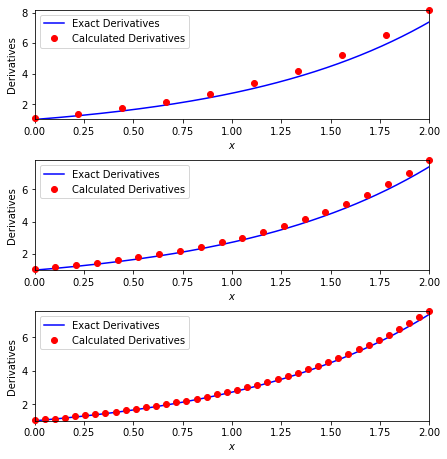

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def ForwardDiff(fx, x, h=0.001):
    # ForwardDiff(@fx, x, h);
    return (fx(x+h) - fx(x))/h

def testDiscretization(h=0.1, l=0, u=2):
    # compute the numerical derivatives
    xh = np.linspace(l, u, int(abs(u-l)/h))
    fprimF = ForwardDiff(np.exp, xh, h)
    return xh, fprimF

# The exact solution
Nx = 400
l, u = 0, 2
x = np.linspace(l, u, Nx)
f_exa = np.exp(x)

# Plot
fig, axs = plt.subplots(3, 1, figsize=(6,6))
fig.tight_layout(pad=0, w_pad=0, h_pad=2)

for i, ax in zip(range(4), axs):
    ax.plot(x, f_exa, color='blue')
    xh, fprimF = testDiscretization(h=0.2*0.5**i)
    ax.plot(xh, fprimF, 'ro', clip_on=False)
    ax.set_xlim([0, 2])
    ax.set_ylim([1,max(fprimF)])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel('Derivatives')
    ax.legend(['Exact Derivatives','Calculated Derivatives'])

可以观察到我们用前向差分得到的导数随着$h$的减小，逐渐靠近真实值。

## 小结：舍入误差 vs. 离散化误差

我们通过下面这个例子来分析和对比这两个误差。

### 例子6: 对比两个误差

继续例子4中的函数$f(x)=e^x$和它的导数$f'(x)=e^x$。取$x=1$,分别用前面提到的三种有限微分方法求出数值导数，并与真实值比较计算出相对误差。

这里我们来观察，当$h$取不同值（$10^{-1}$至$10^{-15}$）的时候，相对误差的变化情况。

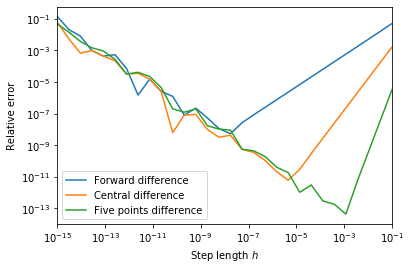

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def ForwardDiff(fx, x, h=0.001):
    # Forward difference
    return (fx(x+h) - fx(x))/h

def CentralDiff(fx, x, h=0.001):
    # Central difference
    return (fx(x+h) - fx(x-h))/h*0.5

def FivePointsDiff(fx, x, h=0.001):
    # Five points difference 
    return (-fx(x+2*h) + 8*fx(x+h) - 8*fx(x-h) + fx(x-2*h)) / (12.0*h)

# choose h from 0.1 to 10^-t, t>=2
t = 15
hx = 10**np.linspace(-1,-t, 30)

# The exact derivative at x=1
x0 = 1
fprimExact = np.exp(1)

# Numerical derivative using the three methods
fprimF = ForwardDiff(np.exp, x0, hx)
fprimC = CentralDiff(np.exp, x0, hx)
fprim5 = FivePointsDiff(np.exp, x0, hx)

# Relative error
felF = abs(fprimExact - fprimF)/abs(fprimExact)
felC = abs(fprimExact - fprimC)/abs(fprimExact)
fel5 = abs(fprimExact - fprim5)/abs(fprimExact)

# Plot
fig, ax = plt.subplots(1)
ax.loglog(hx, felF)
ax.loglog(hx, felC)
ax.loglog(hx, fel5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_xlabel(r'Step length $h$')
ax.set_ylabel('Relative error')
ax.legend(['Forward difference','Central difference', 'Five points difference'])

这是一个非常有趣的结果，我们发现
* 这三种方法的相对误差，随着$h$的不同，呈现出两种不同的特性。
* 当$h$较大时（右半侧），误差曲线相对规则，是由离散化误差主导的。
* 当$h$较小时（左半侧），误差曲线波动较大，是由舍入误差主导。

**注**：舍入误差主导且随着$h$减小而增大的主要原因是：
* 当$h$较小时，有限差分法的分子上相近的数相减会造成类似例子2和3中的舍入误差。
* 由于$f(x)$在$e$附近，这个误差应为$10^{-16}$左右。它除以较小的$h$，就会被相应的放大。因此$h$越小，这个舍入误差越大。

因此，**当我们使用上述方法时，需要注意，尽可能取$h$在误差曲线的右半侧，这样我们对于误差才有完全的控制。**

同时，我们也观察到，对于越是高阶的差分（如五点差分），它的离散化误差随$h$的下降速率越大，但也越早到达舍入误差的区域。
因此，当我们遇到类似问题上，应**选择合适阶数的有限差分方法，并根据它的特性选择适合的$h$值。并不一定是越高阶的方法越好，$h$越小越好。**

本文中所用函数的完整代码见github: [measureErrors.py](https://github.com/enigne/ScientificComputingBridging/blob/master/Lab/L2/measureErrors.py)